In [2]:
import json
import py.myutils as my
import importlib
importlib.reload(my)
import json
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch, Rectangle
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib.patheffects as path_effects
from matplotlib.ticker import MaxNLocator
from matplotlib import rc

# plt.rcParams["font.family"] = "serif"
# plt.rcParams["mathtext.fontset"] = "dejavuserif"

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [ ]:
# x'' + b x' + c x = d * sign(x (t - T) )

# b = -0.2; c = 1; d = c; v = 2; T = 1
# b = 0.2; c = 1; d = -c; v = 2; T = 1
params = dict(
 b = -0.02,
 c = 1, d = 1, v = -0.1, tau = 1,
    h=0.01, T = 50000
)

script = "single_solution"
prefix = script
params_str = json.dumps(params)
#
filename = prefix + " " + params_str
filename = filename[:min(len(filename), 200)]

filename_bin = f"output_bin/{filename}.bin"
#
if recalculate or not os.path.isfile(filename_bin):
    my.run_cpp(script, params=params_str, recompile=recompile)


fig, ax = plt.subplots(1,3, figsize=(8,7/3),dpi=1000)
x, dx, t = my.get_binary(filename_bin)



ax[0].plot(t,x,'k',lw=0.5)
ax[0].set_xlim(0, 500)
ax[0].axhline(0,linestyle=':',c='k',lw=0.3)


ax[1].plot(x, dx,"k",lw=0.0015)

tau = params['tau']

tt = (t>tau)
x1 = x[tt]
xtau1 = x[0:np.count_nonzero(tt)]
dx1 = dx[tt]
X = np.dstack((x1,xtau1,dx1))[0]

ti = 2000
tj = 2010


Xi = X[ti+1]-X[ti]
Xj = X[tj+1]-X[tj]


n = -np.cross(Xi,Xj)
n = n / np.linalg.norm(n)
print(n)


tt = np.where(np.dot(X - X[ti], n) > 0.00001)

Xmasked = np.ma.masked_where((np.dot(X - X[tj], n) < 0.0000000000000026), X.T[0])

print(tt)

n[2] += 0.05

ax[2].plot(Xmasked, np.dot(X, n)-0.001,"k",lw=0.003)
# ax[2].plot(X.T[0][tt], np.dot(X[tt], n),"k",lw=0.005)
ax[2].plot(X.T[0], np.dot(X, n),"k",lw=0.0003)
# ax[2].plot(xx, n[0]*xx + n[1]*xt + n[2]*dxx,"b",lw=0.002)


None

# plt.plot(x[tt],dx[tt],x[0:np.count_nonzero(tt)],lw=0.1)

# ax.azim = 80
# ax.dist = 10
# ax.elev = 30

ax[0].set_xlabel("$t$")
ax[0].set_ylabel("$x$",rotation=0,loc="top",labelpad=-10)
ax[1].set_xlabel("$x$")
ax[1].set_ylabel("$\dot{x}$",rotation=0,loc="top",labelpad=-15)

ax[2].set_xlabel("$x, x_{\\tau}, \\dot{x}$")

for i in range(3):
    ax[i].tick_params(axis='both', labelsize=7)
    ax[i].margins(x=0.1)


plt.savefig(f"output_img/{filename}.jpg", format="jpg", dpi=1000,bbox_inches='tight')


In [ ]:
# x'' + b x' + c x = d * sign(x (t - T) )

# b = -0.2; c = 1; d = c; v = 2; T = 1
# b = 0.2; c = 1; d = -c; v = 2; T = 1
params = dict(
 b = -0.2,
 c = 1, d = 1, v = 2, tau = 1,
    h=0.01, T = 50000
)

script = "single_solution"
prefix = script
params_str = json.dumps(params)
#
filename = prefix + " " + params_str
filename = filename[:min(len(filename), 200)]

filename_bin = f"output_bin/{filename}.bin"
#
if recalculate or not os.path.isfile(filename_bin):
    my.run_cpp(script, params=params_str, recompile=recompile)


fig, ax = plt.subplots(1,3, figsize=(8,7/3),dpi=1000)
x, dx, t = my.get_binary(filename_bin)



ax[0].plot(t,x,'k',lw=0.5)
ax[0].set_xlim(0, 300)
ax[0].axhline(0,linestyle=':',c='k',lw=0.3)


ax[1].plot(x, dx,"k",lw=0.0015)

tau = params['tau']

tt = (t>tau)
x1 = x[tt]
xtau1 = x[0:np.count_nonzero(tt)]
dx1 = dx[tt]
X = np.dstack((x1,xtau1,dx1))[0]

ti = 2000
tj = 2010


Xi = X[ti+1]-X[ti]
Xj = X[tj+1]-X[tj]


n = -np.cross(Xi,Xj)
n = n / np.linalg.norm(n)
print(n)


tt = np.where(np.dot(X - X[ti], n) > 0.00001)

# Xmasked = np.ma.masked_where((np.dot(X - X[tj], n) < 0.0000000000000026), X.T[0])

print(tt)

n[2] += 0.05

# ax[2].plot(Xmasked, np.dot(X, n)-0.001,"k",lw=0.003)
# ax[2].plot(X.T[0][tt], np.dot(X[tt], n),"k",lw=0.005)
ax[2].plot(X.T[0], np.dot(X, n),"k",lw=0.003)
# ax[2].plot(xx, n[0]*xx + n[1]*xt + n[2]*dxx,"b",lw=0.002)
# ax[2].plot(xx*np.cos(alpha) + dxx*np.sin(alpha), n[0]*xx + n[1]*xt + n[2]*dxx,"k",lw=0.002)


None

# plt.plot(x[tt],dx[tt],x[0:np.count_nonzero(tt)],lw=0.1)

# ax.azim = 80
# ax.dist = 10
# ax.elev = 30

ax[0].set_xlabel("$t$")
ax[0].set_ylabel("$x$",rotation=0,loc="top",labelpad=-10)
ax[1].set_xlabel("$x$")
ax[1].set_ylabel("$\dot{x}$",rotation=0,loc="top",labelpad=-15)

ax[2].set_xlabel("$x, x_{\\tau}, \\dot{x}$")

for i in range(3):
    ax[i].tick_params(axis='both', labelsize=7)
    ax[i].margins(x=0.1)


plt.savefig(f"output_img/{filename}.jpg", format="jpg", dpi=1000,bbox_inches='tight')


In [ ]:
# x'' + b x' + c x = d * sign(x (t - T) )

# b = -0.2; c = 1; d = c; v = 2; T = 1
# b = 0.2; c = 1; d = -c; v = 2; T = 1
params = dict(
 b = -0.2,
 c = 1, d = 1, v = 2, tau = 1,
    h=0.01, T = 50000
)

script = "single_solution"
prefix = script
params_str = json.dumps(params)
#
filename = prefix + " " + params_str
filename = filename[:min(len(filename), 200)]

filename_bin = f"output_bin/{filename}.bin"
#
if recalculate or not os.path.isfile(filename_bin):
    my.run_cpp(script, params=params_str, recompile=recompile)


fig, ax = plt.subplots(1,2, figsize=(8,7/3),dpi=1000,width_ratios=[3, 1])
x, dx, t = my.get_binary(filename_bin)

plt.tight_layout()

ax[0].plot(t,x,'k',lw=0.5)
ax[0].set_xlim(0, 500)
ax[0].axhline(0,linestyle=':',c='k',lw=0.3)


ax[1].plot(x, dx,"k",lw=0.0015)

None

# plt.plot(x[tt],dx[tt],x[0:np.count_nonzero(tt)],lw=0.1)

# ax.azim = 80
# ax.dist = 10
# ax.elev = 30

ax[0].set_xlabel("$t$")
ax[0].set_ylabel("$x$",rotation=0,loc="top",labelpad=-10)
ax[1].set_xlabel("$x$")
ax[1].set_ylabel("$\dot{x}$",rotation=0,loc="top",labelpad=-15)


for i in range(2):
    ax[i].tick_params(axis='both', labelsize=7)



plt.savefig(f"output_img/{filename}.jpg", format="jpg", dpi=1000)


In [4]:
recalculate = recompile = True


~~~ cpp/single_solution.cpp is executed ~~~
~~~  parameters: {"b": 0.25, "c": -0.125, "d": -1, "v": 0.05, "tau": 1, "h": 0.01, "T": 200} ~~~


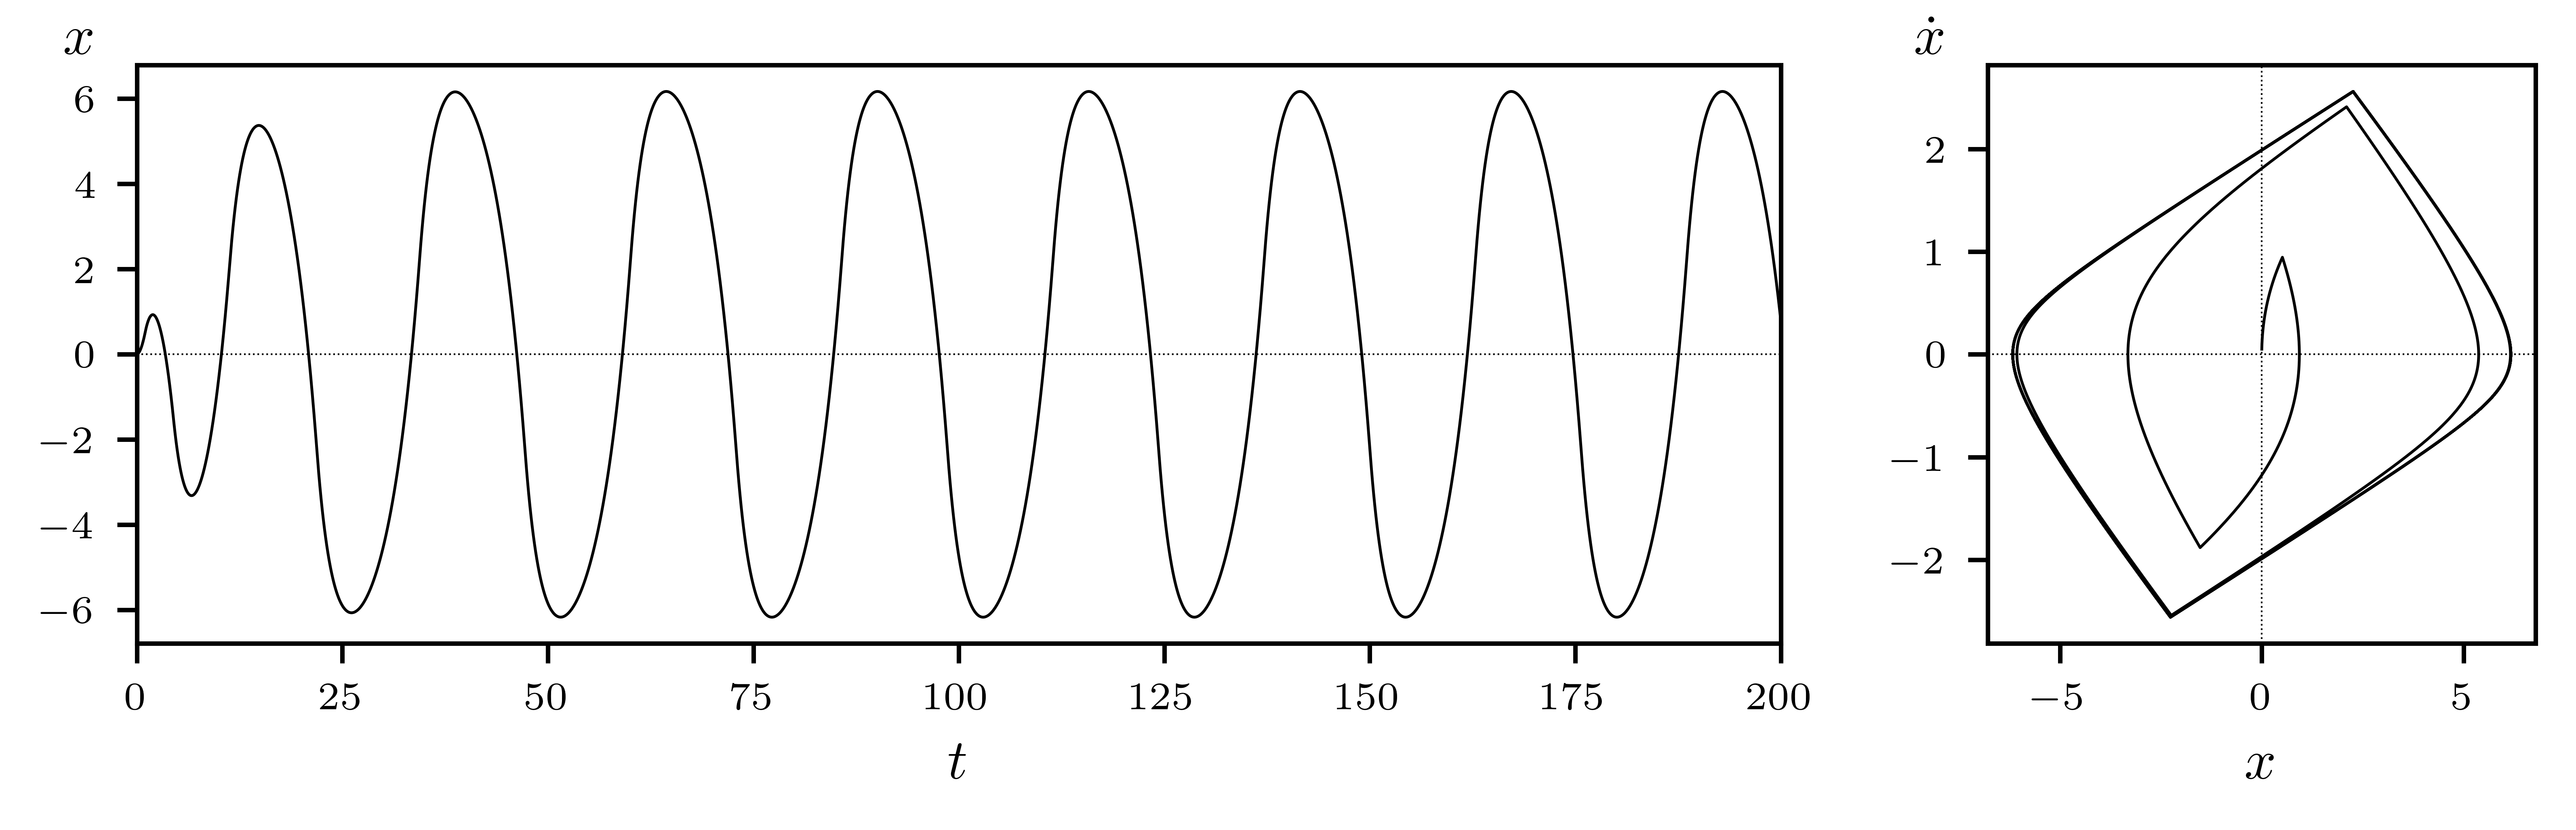

In [5]:
# x'' + b x' + c x = d * sign(x (t - T) )

# b = -0.2; c = 1; d = c; v = 2; T = 1
# b = 0.2; c = 1; d = -c; v = 2; T = 1
params = dict(
 b = 0.25,
 c = -0.125, d = -1, v = 0.05, tau = 1,
    h=0.01, T = 200
)

script = "single_solution"
prefix = script
params_str = json.dumps(params)
#
filename = prefix + " " + params_str
filename = filename[:min(len(filename), 200)]

filename_bin = f"output_bin/{filename}.bin"
#
if recalculate or not os.path.isfile(filename_bin):
    my.run_cpp(script, params=params_str, recompile=recompile)


fig, ax = plt.subplots(1,2, figsize=(6.6,2),dpi=1000,width_ratios=[3, 1])
x, dx, t = my.get_binary(filename_bin)

plt.tight_layout()

ax[0].plot(t,x,'k',lw=0.5)
# ax[0].set_xlim(0, 500)
ax[0].axhline(0,linestyle=':',c='k',lw=0.3)


ax[1].plot(x, dx,"k",lw=0.5)
ax[1].axhline(0,linestyle=':',c='k',lw=0.3)
ax[1].axvline(0,linestyle=':',c='k',lw=0.3)

None

# plt.plot(x[tt],dx[tt],x[0:np.count_nonzero(tt)],lw=0.1)

# ax.azim = 80
# ax.dist = 10
# ax.elev = 30

ax[0].set_xlabel("$t$")
ax[0].set_ylabel("$x$",rotation=0,loc="top",labelpad=-10)
ax[1].set_xlabel("$x$")
ax[1].set_ylabel("$\dot{x}$",rotation=0,loc="top",labelpad=-10)


for i in range(2):
    ax[i].tick_params(axis='both', labelsize=7)

ax[0].set_xmargin(0.0)


plt.savefig(f"output_img/{filename}.jpg", format="jpg", dpi=1000)


In [3]:
re=-0.5
im=5.4
params = dict(
        b = -2 * re,
        c = re*re + im*im,
        d = -1,
        tau = 1,
        v_n = 10000,
        v_l = 0.001,
        v_r = 0.7,
        T = 10,
        h = 0.01,
)


script = "single_solution"
prefix = script
params_str = json.dumps(params)
#
filename = prefix + " " + params_str
filename = filename[:min(len(filename), 200)]

filename_bin = f"output_bin/{filename}.bin"
#
if recalculate or not os.path.isfile(filename_bin):
    my.run_cpp(script, params=params_str, recompile=recompile)


fig, ax = plt.subplots(1,2, figsize=(6.6,2),dpi=1000,width_ratios=[3, 1])
x, dx, t = my.get_binary(filename_bin)

plt.tight_layout()

ax[0].plot(t,x,'k',lw=0.5)
# ax[0].set_xlim(0, 500)
ax[0].axhline(0,linestyle=':',c='k',lw=0.3)


ax[1].plot(x, dx,"k",lw=0.5)
ax[1].axhline(0,linestyle=':',c='k',lw=0.3)
ax[1].axvline(0,linestyle=':',c='k',lw=0.3)

None

# plt.plot(x[tt],dx[tt],x[0:np.count_nonzero(tt)],lw=0.1)

# ax.azim = 80
# ax.dist = 10
# ax.elev = 30

ax[0].set_xlabel("$t$")
ax[0].set_ylabel("$x$",rotation=0,loc="top",labelpad=-10)
ax[1].set_xlabel("$x$")
ax[1].set_ylabel("$\dot{x}$",rotation=0,loc="top",labelpad=-10)


for i in range(2):
    ax[i].tick_params(axis='both', labelsize=7)

ax[0].set_xmargin(0.0)


plt.savefig(f"output_img/{filename}.jpg", format="jpg", dpi=1000)


NameError: name 'recalculate' is not defined